In [67]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [71]:
IMAGE_SIZE = [224, 224]

dataset_path = "/content/drive/MyDrive/Dataset_IC01/Gigi Tampak Depan"

In [72]:
class_labels = ['Radang Gusi', 'Perubahan Warna Gigi', 'Gigi Sehat', 'Gigi berlubang', 'Bukan Gigi']

In [73]:
for layer in inception.layers:
    layer.trainable = False

In [74]:
files = os.listdir(dataset_path)
print(files)

['Gigi Sehat', 'Perubahan Warna Gigi', 'Radang Gusi', 'Gigi Berlubang', 'Bukan Gigi']


In [75]:
# Initialize an empty list to store the image files
image_files = []

# Iterate over the subdirectories
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    for file in os.listdir(subdir_path):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(subdir_path, file))

# Split the image files into training and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [77]:
x = Flatten()(inception.output)
prediction = Dense(len(files), activation='softmax')(x)

In [78]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [79]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [80]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [81]:
# Training Generator
training_set = train_datagen.flow_from_directory(dataset_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes=class_labels)

Found 6210 images belonging to 5 classes.


In [82]:
# Testing Generator
test_set = test_datagen.flow_from_directory(dataset_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes=class_labels)

Found 6210 images belonging to 5 classes.


In [83]:
# fit the model, it will take some time to execute
model1 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
195/195 [==============================] - 2610s 13s/step - loss: 2.1359 - accuracy: 0.7552 - val_loss: 1.3409 - val_accuracy: 0.8287
Epoch 2/10
195/195 [==============================] - 1442s 7s/step - loss: 0.8827 - accuracy: 0.8783 - val_loss: 0.2781 - val_accuracy: 0.9415
Epoch 3/10
195/195 [==============================] - 1442s 7s/step - loss: 0.4665 - accuracy: 0.9216 - val_loss: 0.1873 - val_accuracy: 0.9614
Epoch 4/10
195/195 [==============================] - 1446s 7s/step - loss: 0.2194 - accuracy: 0.9576 - val_loss: 0.3410 - val_accuracy: 0.9304
Epoch 5/10
195/195 [==============================] - 1445s 7s/step - loss: 0.1663 - accuracy: 0.9641 - val_loss: 0.1261 - val_accuracy: 0.9721
Epoch 6/10
195/195 [==============================] - 1450s 7s/step - loss: 0.2751 - accuracy: 0.9517 - val_loss: 1.0472 - val_accuracy: 0.8820
Epoch 7/10
195/195 [==============================] - 1441s 7s/step - loss: 0.3192 - accuracy: 0.9522 - val_loss: 0.1040 - val_accuracy

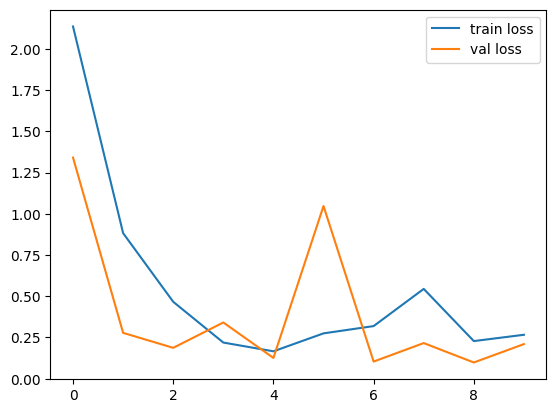

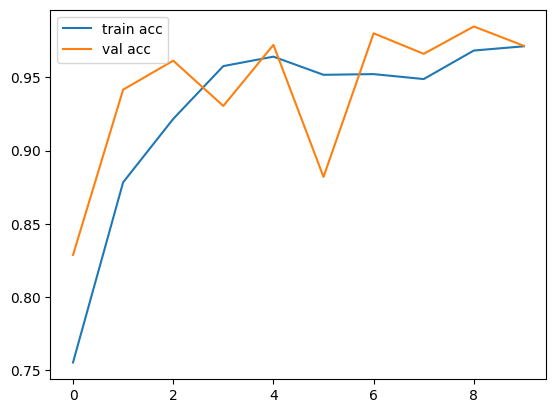

<Figure size 640x480 with 0 Axes>

In [84]:
# Plot the Loss and Accuracy
# Loss
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(model1.history['accuracy'], label='train acc')
plt.plot(model1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [86]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_gigi_depan97.h5')